# kNN Algorithm From Scratch

####  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer

#### Making the kNN algorithm

In [2]:
class kNearestNeighbors():
    
    
    #Initializing the number of neighbors
    
    def __init__(self, n = 1):
        self.neighbors = n
        
        
    #knn algorithm stores all the values at once and that is all it does for storing the values 
    # and  thus training this model is easy, apart from the fact that you need more storage space as
    #the size of you training dataset increases and after a point it might not be feasible to use k nearst
    #algorithm
    
    def train_model(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
    
    
    #testing the model on the test set or predicting new values is relatively simple apart from the fact that 
    #sometimes it might take some time to look through all the examples in the dataset.
    
    #abs distance
    def predict_model_abs(self, X_test):
        print('Absolute')
        length = X_test.shape[0]
        y_pred = np.zeros(length, dtype = self.y_train.dtype)
        for index in range(length):
            distance = np.sum(np.abs(self.x_train - X_test[index, :]), axis = 1)
            min_index = np.argmin(distance)
            y_pred[index] = self.y_train[min_index]
        return y_pred
    
    #minkowsky distance, r =2
    def predict_model_mkw(self, X_test, dist):
        print('Minkowsky')
        length = X_test.shape[0]
        y_pred = np.zeros(length, dtype = self.y_train.dtype)
        for index in range(length):
            distance = (np.sum(np.abs(self.x_train - X_test[index, :])**2, axis = 1))**0.5
            min_index = np.argmin(distance)
            y_pred[index] = self.y_train[min_index]
        return y_pred
    
    def accuracy(self, a, b):
        assert len(a) == len(b)
        count = 0
        for i in range(len(a)):
            if a[i] == b[i]:
                count+=1
        return count/len(a)*100

In [3]:
def plotgraph(X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    plt.figure(2, figsize=(6, 4))
    plt.clf()

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

#### Iris Dataset

(150, 4) (150,)


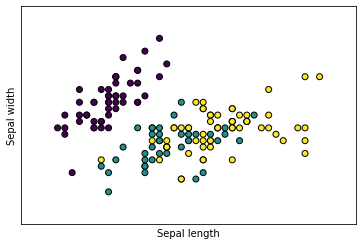

In [4]:
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)
plotgraph(X, y)

In [5]:
model = kNearestNeighbors()
model.train_model(X_train, y_train)

ypred = model.predict_model_abs(X_test)
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

ypred = model.predict_model_mkw(X_test, dist = 'mkw')
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

Absolute
100.00 %
Minkowsky
100.00 %


#### Digit Dataset

In [6]:
X, y = load_digits(return_X_y= True)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

(1797, 64) (1797,)


In [7]:
model = kNearestNeighbors()
model.train_model(X_train, y_train)

ypred = model.predict_model_abs(X_test)
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

ypred = model.predict_model_mkw(X_test, dist = 'mkw')
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

Absolute
97.50 %
Minkowsky
97.78 %


#### Wine Dataset

(178, 13) (178,)


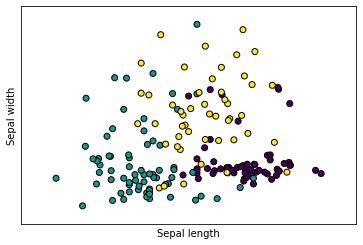

In [8]:
X, y = load_wine(return_X_y= True)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)
plotgraph(X, y)

In [9]:
model = kNearestNeighbors()
model.train_model(X_train, y_train)

ypred = model.predict_model_abs(X_test)
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

ypred = model.predict_model_mkw(X_test, dist = 'mkw')
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

Absolute
83.33 %
Minkowsky
77.78 %


#### Breast Cancer Dataset

(569, 30) (569,)


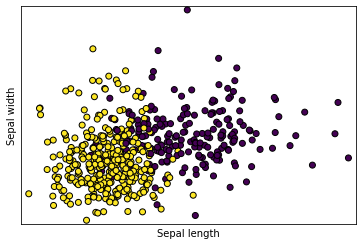

In [10]:
X, y = load_breast_cancer(return_X_y= True)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)
plotgraph(X, y)

In [11]:
model = kNearestNeighbors()
model.train_model(X_train, y_train)

ypred = model.predict_model_abs(X_test)
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

ypred = model.predict_model_mkw(X_test, dist = 'mkw')
print("{:0.2f} %".format(model.accuracy(ypred, y_test)))

Absolute
92.98 %
Minkowsky
92.98 %
